In [1]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imshow

Let's define a label image, just for testing

c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


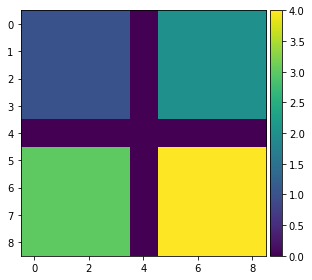

In [2]:
label_map = cle.push(np.asarray([
    [1, 1, 1, 1, 0, 2, 2, 2, 2],
    [1, 1, 1, 1, 0, 2, 2, 2, 2],
    [1, 1, 1, 1, 0, 2, 2, 2, 2],
    [1, 1, 1, 1, 0, 2, 2, 2, 2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [3, 3, 3, 3, 0, 4, 4, 4, 4],
    [3, 3, 3, 3, 0, 4, 4, 4, 4],
    [3, 3, 3, 3, 0, 4, 4, 4, 4],
    [3, 3, 3, 3, 0, 4, 4, 4, 4]
]))

imshow(cle.pull(label_map))

# Determine centroid positions of the labels

In [3]:
centroid_pointlist = cle.label_centroids_to_pointlist(label_map)
print(centroid_pointlist)

[[1.5 1.5 6.5 6.5]
 [1.5 6.5 1.5 6.5]]


c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


# Determine distance matrix

In [4]:
distance_matrix = cle.generate_distance_matrix(centroid_pointlist, centroid_pointlist)
print(distance_matrix)

[[0.        0.        0.        0.        0.       ]
 [0.        0.        5.        5.        7.0710683]
 [0.        5.        0.        7.071068  5.       ]
 [0.        5.        7.071068  0.        5.       ]
 [0.        7.071068  5.        5.        0.       ]]


# Draw mesh between centroids with distance == 5

In [5]:
connection_matrix = cle.equal_constant(distance_matrix, constant=5)
print(connection_matrix)

[[0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0.]]


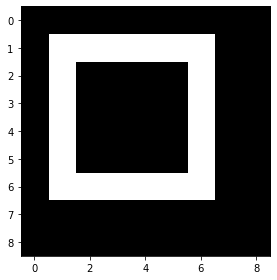

In [6]:
mesh = cle.create_like(label_map)
cle.touch_matrix_to_mesh(centroid_pointlist, connection_matrix, mesh)
imshow(cle.pull(mesh))

# Draw mesh between centroids with distance >= 5

In [7]:
connection_matrix = cle.greater_or_equal_constant(distance_matrix, constant=5)
print(connection_matrix)

[[0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1.]
 [0. 1. 0. 1. 1.]
 [0. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0.]]


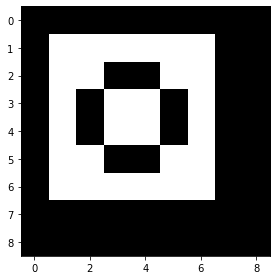

In [8]:
mesh = cle.create_like(label_map)
cle.touch_matrix_to_mesh(centroid_pointlist, connection_matrix, mesh)
imshow(cle.pull(mesh))